# Imports

In [2]:
import time
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

warnings.filterwarnings('ignore')

# Constant

In [3]:
ARIMA_PREDICTIONS = "/kaggle/input/weather-underground/ARIMA_Forecasts_Datetime.csv"
GM_PREDICTIONS = "/kaggle/input/weather-underground/GM_Forecasts.csv"

# Code

In [6]:
df_arima_predictions = pd.read_csv(ARIMA_PREDICTIONS)
df_gm_predictions = pd.read_csv(GM_PREDICTIONS)

In [11]:
df_arima_predictions = df_arima_predictions.rename(columns={'Forecasts': 'ARIMA_Forecast'})
df_arima_predictions.head(3)

,Index,ARIMA_Forecast
0,8321,-0.487280
1,8322,-0.318901
2,8323,-0.252342


In [21]:
df_gm_predictions = df_gm_predictions.rename(columns={'Forecasts': 'GM_Forecast', 'Actual': 'Temp_Diff'})
df_gm_predictions['Datetime'] = pd.to_datetime(df_gm_predictions['Datetime'])
df_gm_predictions.head(3)

,Index,Datetime,Temp_Diff,GM_Forecast
0,8321,2024-05-25 00:30:00,0.0,25.905326
1,8322,2024-05-25 01:00:00,0.0,25.907901
2,8323,2024-05-25 01:30:00,0.0,25.910475


In [22]:
df_merged_forecasts = pd.merge(df_arima_predictions, df_gm_predictions, on=['Index'], how='inner')
df_merged_forecasts = df_merged_forecasts[['Index', 'Datetime', 'Temp_Diff', 'ARIMA_Forecast', 'GM_Forecast']]
df_merged_forecasts

,Index,Datetime,Temp_Diff,ARIMA_Forecast,GM_Forecast
0,8321,2024-05-25 00:30:00,0.0,-0.487280,25.905326
1,8322,2024-05-25 01:00:00,0.0,-0.318901,25.907901
2,8323,2024-05-25 01:30:00,0.0,-0.252342,25.910475
3,8324,2024-05-25 02:00:00,0.0,-0.163692,25.907215
4,8325,2024-05-25 02:30:00,0.0,-0.060384,25.909787
...,...,...,...,...,...
329,8651,2024-05-31 21:30:00,0.0,-0.545684,27.669459
330,8652,2024-05-31 22:00:00,0.0,-0.519263,27.672173
331,8653,2024-05-31 22:30:00,0.0,-0.392363,27.674887
332,8654,2024-05-31 23:00:00,-2.0,-0.377810,27.671237


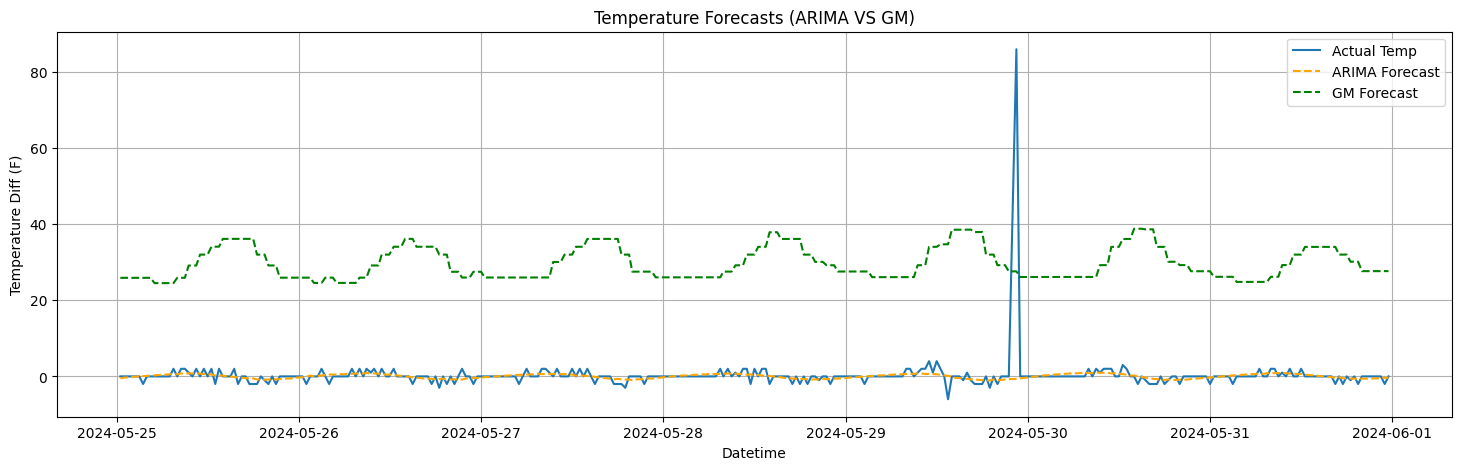

In [35]:
# Plotting
plt.figure(figsize=(18, 5))

plt.plot(df_merged_forecasts['Datetime'], df_merged_forecasts['Temp_Diff'], label='Actual Temp')
plt.plot(df_merged_forecasts['Datetime'], df_merged_forecasts['ARIMA_Forecast'], label='ARIMA Forecast', linestyle='--', color='orange')
plt.plot(df_merged_forecasts['Datetime'], df_merged_forecasts['GM_Forecast'], label='GM Forecast', linestyle='--', color='green')

plt.xlabel('Datetime')
plt.ylabel('Temperature Diff (F)')
plt.title('Temperature Forecasts (ARIMA VS GM)')
plt.legend()
plt.grid(True)
plt.show()

## MSE Comparison

In [36]:
mse_arima = ((df_merged_forecasts['Temp_Diff'] - df_merged_forecasts['ARIMA_Forecast']) ** 2).mean()
mse_gm = ((df_merged_forecasts['Temp_Diff'] - df_merged_forecasts['GM_Forecast']) ** 2).mean()

print(f'MSE ARIMA: {mse_arima} VS MSE GM: {mse_gm}')

MSE ARIMA: 23.54000157443077 VS MSE GM: 907.9506190836173
